### FIFA 데이터는 가상의 온라인 축구게임에 등장하는 축구 선수의 주요 특징과 신체 정보에 대한 데이터이며, 변수 설명은 아래와 같다.(책 참고)

In [1]:
# 모듈 가져오기
import pandas as pd

In [2]:
# 데이터 가져오기
FIFA = pd.read_csv('./Data/data_edu/모의고사 1회/FIFA.csv', encoding = 'cp949')

In [3]:
# 데이터 확인 - head()
FIFA.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355


In [4]:
# 데이터 shape 확인
FIFA.shape

(16642, 16)

In [5]:
# 데이터 타입 정보 확인
FIFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16642 entries, 0 to 16641
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    16642 non-null  int64 
 1   Name                  16642 non-null  object
 2   Age                   16642 non-null  int64 
 3   Nationality           16642 non-null  object
 4   Overall               16642 non-null  int64 
 5   Club                  16642 non-null  object
 6   Preferred_Foot        16642 non-null  object
 7   Work_Rate             16642 non-null  object
 8   Position              16642 non-null  object
 9   Jersey_Number         16642 non-null  int64 
 10  Contract_Valid_Until  16642 non-null  int64 
 11  Height                16642 non-null  object
 12  Weight_lb             16642 non-null  int64 
 13  Release_Clause        16642 non-null  int64 
 14  Value                 16642 non-null  int64 
 15  Wage                  16642 non-null

### 1) FIFA데이터에서 각 선수의 키는 Height변수에 피트와 인치로 입력되어 있습니다. 이를 cm로 변환하여 새로운 변수 Height_cm을 생성하시오.

In [6]:
# Height 데이터 확인
FIFA['Height']

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
16637     5'9
16638     6'3
16639     5'8
16640    5'10
16641    5'10
Name: Height, Length: 16642, dtype: object

- '앞은 피트 '뒤는 인치
- 1피트 = 30cm, 1인치 = 2.5cm
- 전처리 전략
    - 1. '를 기준으로 데이터를 분할
    - 2. 분할된 데이터의 앞쪽 x 30 + 분할된 데이터의 뒤쪽 x 2.5
    - 3. 새로운 컬럼 정의   

In [7]:
# 1-1. 데이터 분할하기
feet = FIFA['Height'].str.split("'").str.get(0)
inch = FIFA['Height'].str.split("'").str.get(1)

In [8]:
# 1-2. 데이터 확인
feet, inch

(0        5
 1        6
 2        5
 3        6
 4        5
         ..
 16637    5
 16638    6
 16639    5
 16640    5
 16641    5
 Name: Height, Length: 16642, dtype: object,
 0         7
 1         2
 2         9
 3         4
 4        11
          ..
 16637     9
 16638     3
 16639     8
 16640    10
 16641    10
 Name: Height, Length: 16642, dtype: object)

- 데이터 확인결과 feet, inch 둘다 object 타입이다.
- 따라서, 연산을 위해 float값으로 변환 한다.

In [9]:
# 1-3. 데이터 타입 변환
feet = feet.astype('float')
inch = inch.astype('float')

In [10]:
# 2-1. 위의 식대로 계산한다 - 브로드캐스팅 이용
Height_cm = feet * 30 + inch * 2.5

In [11]:
# 3-1 새로운 컬럼 정의하기 - Height_cm
FIFA['Height_cm'] = Height_cm

In [12]:
# 데이터 확인
FIFA['Height_cm']

0        167.5
1        185.0
2        172.5
3        190.0
4        177.5
         ...  
16637    172.5
16638    187.5
16639    170.0
16640    175.0
16641    175.0
Name: Height_cm, Length: 16642, dtype: float64

### 2) 포지션을 의미하는 Position변수를 아래 표를 참고하여 "Forward", "Midfielder", "Defender", "GoalKeeper"로 재범주화하고, factor형으로 변환하여 Position_Class라는 변수를 생성하고 저장

|구분|내용|
|:--:|:--:|
|Forward|LS, ST, RS, LW, LF, CF, RF, RW|
|Midfielder|LAM, CAM, RAM, LM, LCM, CM, RCM, RM|
|Defender|LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB|
|GoalKeeper|GK|

- 전략
    - 1. class_position 빈리스트 정의
    - 2. if, elif, else를 이용하여 해당선수를 분류한다.
    - 3. 분류된 선수들의 정보를 이용해 새로운 컬럼을 정의

In [13]:
# 1-1. 리스트 정의
Forward_contents = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
Midfielder_contents = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM']
Defender_contents = ['LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
GoalKeeper = ['GK']

In [14]:
# 2-1. 조건문을 이용해 선수들의 포지션을 분류
class_position = list()
for pos in FIFA['Position']:
    if pos in Forward_contents:
        pos = 'Forward'
        class_position.append(pos)
    elif pos in Midfielder_contents:
        pos = 'Midfielder'
        class_position.append(pos)
    elif pos in Defender_contents:
        pos = 'Defender'
        class_position.append(pos)
    else:
        pos = 'GoalKeeper'
        class_position.append(pos)

In [15]:
# 3-1. 새로운 컬럼 정의
FIFA['Position_class'] = class_position

In [16]:
# 3-2. 데이터 확인
FIFA[['Position', 'Position_class']]

,Position,Position_class
0,RF,Forward
1,ST,Forward
2,LW,Forward
3,GK,GoalKeeper
4,RCM,Midfielder
...,...,...
16637,CM,Midfielder
16638,ST,Forward
16639,ST,Forward
16640,RW,Forward


### 3) 새로 생성한 Position_Class 변수의 각 범주에 따른 Value(선수의 시장가치)의 평균값의 차이를 비교하는 일원배치 분산분석을 수행하고 결과를 해석하시오. 그리고 평균값의 차이가 통계적으로 유의하다면 사후검정을 수행하고 설명하시오

In [17]:
# 일원배치 분산분석을 위한 모듈 가져오기
from statsmodels.stats.anova import anova_lm
import numpy as np

In [18]:
# 데이터에서 필요한 부분만 추출해서 가져오기
FIFA_part1 = FIFA[['Position_class', 'Value']]
FIFA_part1

,Position_class,Value
0,Forward,110500
1,Forward,77000
2,Forward,118500
3,GoalKeeper,72000
4,Midfielder,102000
...,...,...
16637,Midfielder,60
16638,Forward,60
16639,Forward,60
16640,Forward,60


- 전략
    - 1. 분산분석을 위해 범주별로 데이터를 분할
    - 2. boxplot으로 대략적인 데이터 확인
    - 3. 일원분산 분석 실시
    - 4. 해석
    - 5. 사후검정

In [19]:
# 1-1 범주에 따른 데이터 분할
df_Forward = FIFA_part1[FIFA_part1['Position_class'] == 'Forward']
df_Midfielder = FIFA_part1[FIFA_part1['Position_class'] == 'Midfielder']
df_Defender = FIFA_part1[FIFA_part1['Position_class'] == 'Defender']
df_GoalKeeper = FIFA_part1[FIFA_part1['Position_class'] == 'GoalKeeper']

{'whiskers': [<matplotlib.lines.Line2D at 0x204422dcdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x204422f84c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x204422dca60>,
 'medians': [<matplotlib.lines.Line2D at 0x204422f8b80>,
 'fliers': [<matplotlib.lines.Line2D at 0x204422f8e80>,
 'means': []}

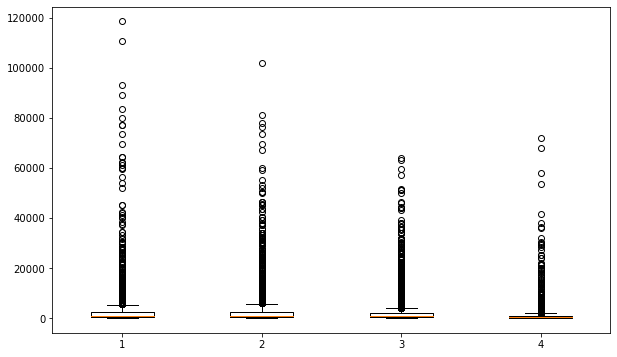

In [20]:
# 2-1. boxplot 그려보기
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.boxplot([df_Forward['Value'], df_Midfielder['Value'], df_Defender['Value'], df_GoalKeeper['Value']])

In [21]:
# 3-1 일원분산분석 모델생성
from statsmodels.formula.api import ols
formula = 'Value ~ C(Position_class)'
model = ols(formula, FIFA_part1).fit()

In [22]:
# 3-2 일워분산분석 분석실시
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Position_class),3.0,4.081181e+09,1.360394e+09,41.873906,5.988667e-27
Residual,16638.0,5.405330e+11,3.248786e+07,NaN,NaN


In [23]:
# 4-1 해석
# 일원분산분석의 귀무가설과 대립가설을 살펴보자
# 귀무가설 : 모든 범주의 평균값이 동일하다
# 대립가설 : 적어도 하나의 범주의 평균값이 동일하지 않다
# 현재, p-value가 0.05보다 매우 작으므로 귀무가설을 채택할 수 없다
# 따라서, 모든 범주의 평균값이 동일한것은 아니다라고 결론지을 수 있다.

In [24]:
# 5-1 사후검정 - 튜키의 HSD 방법을 이용
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(FIFA_part1['Value'], FIFA_part1['Position_class'])
print(posthoc)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1     group2    meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------
  Defender    Forward    930.373  0.001   610.7429  1250.0031   True
  Defender GoalKeeper  -507.3848 0.0034  -887.6261  -127.1436   True
  Defender Midfielder   760.8787  0.001   486.7123   1035.045   True
   Forward GoalKeeper -1437.7579  0.001 -1865.9234 -1009.5923   True
   Forward Midfielder  -169.4944 0.5609  -506.9991   168.0104  False
GoalKeeper Midfielder  1268.2635  0.001   872.8782  1663.6488   True
--------------------------------------------------------------------


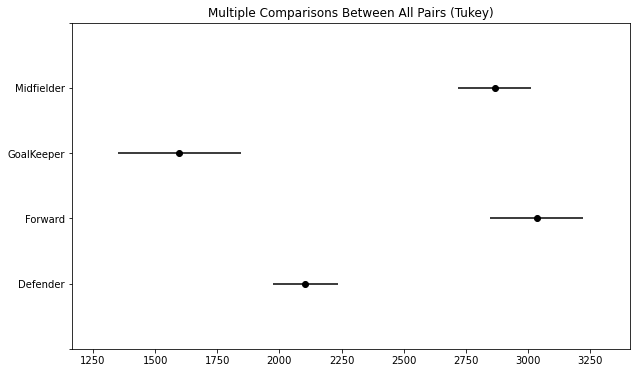

In [25]:
# 5-2 사후검정 - 시각화
fig = posthoc.plot_simultaneous()

In [26]:
# 5-3 사후검정 해석
# 귀무가설 : 집단들 사이의 평균은 같다
# 대립가설 : 적어도 하나의 집단의 평균은 다르다
# Forward - Midfielder 그룹을 제외한 모든 그룹들간의 평균차이에 대한 p-ajd 값이 0.05보다 작다.
# 따라서, 평균값이 동일하지 않다. 다만, Forward - Midfielder의 평균값은 같다고 말할 수 있다.

### 4)Preferred Foot과 Position_class변수에 따라 Value의 차이가 있는지를 알아보기 위해 이원배치분산분석을 수행하고 결과를 해석하시오.

In [34]:
# 필요한 부분만 데이터 추출하기
FIFA_part2 = FIFA[['Preferred_Foot', 'Position_class', 'Value']]

In [35]:
# 데이터 확인하기
FIFA_part2

,Preferred_Foot,Position_class,Value
0,Left,Forward,110500
1,Right,Forward,77000
2,Right,Forward,118500
3,Right,GoalKeeper,72000
4,Right,Midfielder,102000
...,...,...,...
16637,Right,Midfielder,60
16638,Right,Forward,60
16639,Right,Forward,60
16640,Right,Forward,60


- 전략
    - 1. 이원분산분석
    - 2. 해석


In [36]:
# 1-1. 이원분산분석 - 모델 생성
formula = 'Value ~ C(Preferred_Foot)*C(Position_class)'
model = ols(formula, FIFA_part2).fit()

In [37]:
# 1-1. 이원분산분석 - 데이터 분석
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Preferred_Foot),1.0,1.460850e+08,1.460850e+08,4.500734,3.389505e-02
C(Position_class),3.0,4.087367e+09,1.362456e+09,41.975902,5.151392e-27
C(Preferred_Foot):C(Position_class),3.0,4.736156e+08,1.578719e+08,4.863874,2.207249e-03
Residual,16634.0,5.399071e+11,3.245805e+07,NaN,NaN


In [39]:
# 2-2. 해석
# 귀무가설
# Preferred_Foot변수에 따른 Value의 값에는 차이가 없다.
# Position_class변수에 따른 Value의 값에는 차이가 없다.
# Preferred_Foot변수와 Position_class 상호작용의 효과가 없다.
# 대립가설
# Preferred_Foot변수에 따른 Value의 값에 차이가 있다.
# Position_class변수에 따른 Value의 값에 차이가 있다.
# Preferred_Foot변수와 Position_class 상호작용의 효과가 있다.
# p-value의 값을 확인했을때, 3개의 변수에 작용에 대해서 모두 0.05보다 작은 값을 갖는다.
# 따라서, 귀무가설을 채택할수 없고 대립가설을 채택한다.
# 따라서, 변수에 따른 값의 변화가 있고, Preferred_Foot과 Position_class의 상호작용도 있다.

### 5) Age, Overall, Wage, Height_cm, Weight_lb가 Value에 영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석

In [56]:
# 필요한부분만 데이터 추출하기
FIFA_part3 = FIFA[['Age', 'Overall', 'Wage', 'Height_cm', 'Weight_lb', 'Value']]

In [57]:
# 데이터 확인
FIFA_part3

,Age,Overall,Wage,Height_cm,Weight_lb,Value
0,31,94,565,167.5,159,110500
1,33,94,405,185.0,183,77000
2,26,92,290,172.5,150,118500
3,27,91,260,190.0,168,72000
4,27,91,355,177.5,154,102000
...,...,...,...,...,...,...
16637,19,47,1,172.5,134,60
16638,19,47,1,187.5,170,60
16639,16,47,1,170.0,148,60
16640,17,47,1,175.0,154,60


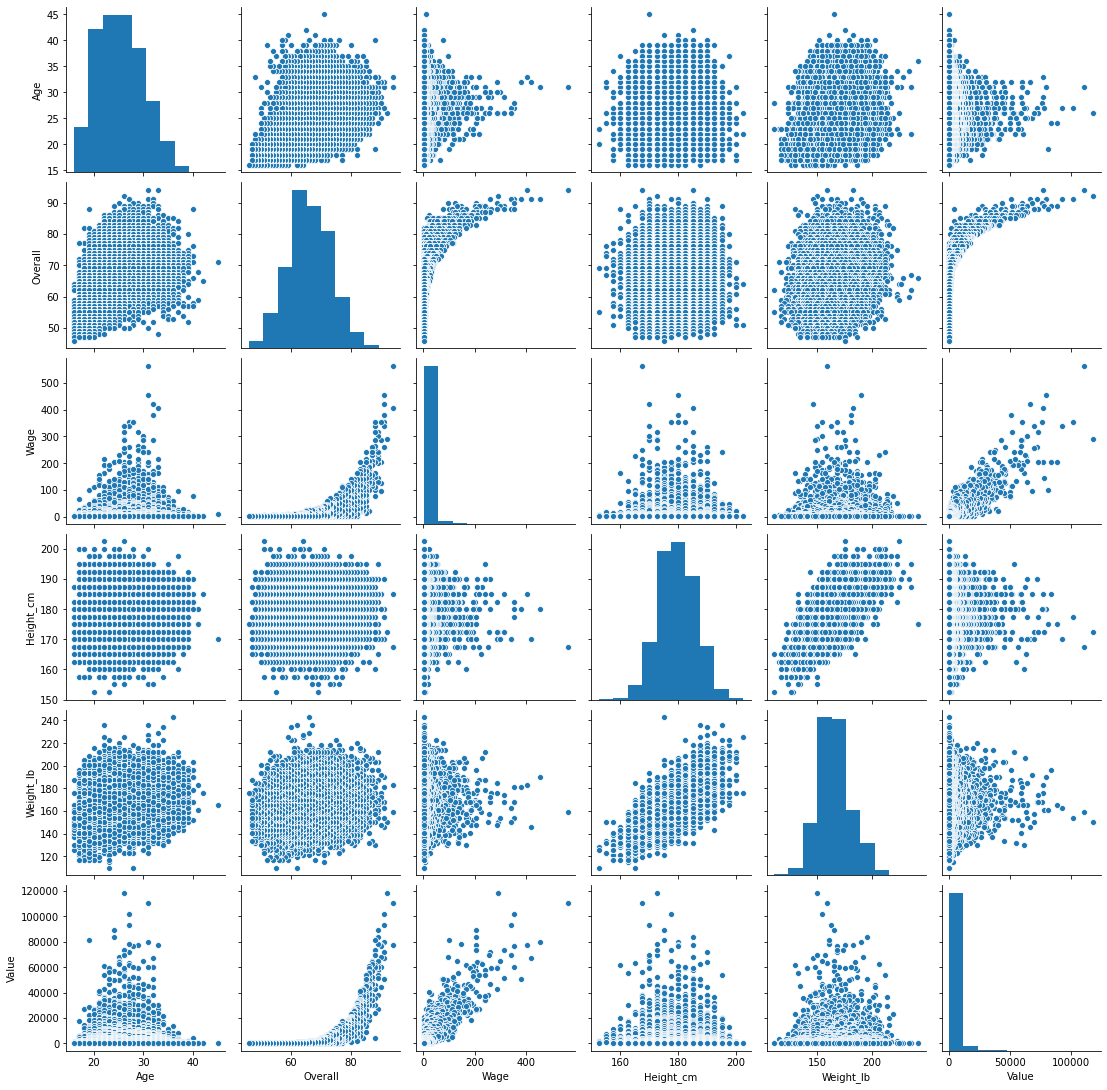

In [58]:
# 대략적인 관계를 확인하기 위해서 pariplot을 그려본다.
import seaborn as sns
sns.pairplot(FIFA_part3)

In [59]:
# 대략적인 상관관계를 확인하기 위해 상관계수를 확인한다
# 모두 수치형 데이터이기 떄문에 피어슨 상관계수를 구한다
corr = FIFA_part3.corr(method = 'pearson')

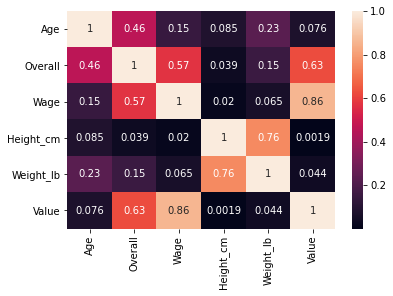

In [60]:
# 상관계수 확인 - heatmap 이용
sns.heatmap(corr, annot = True, )

- 전략 - 후진제거법 선택
    
    - 1. 컬럼 데이터를 리스트로 정의
    - 2. 독립변수와 종속변수데이터를 분할한다 (X,y)
    - 3. train, test 데이터를 나눈 후, 절편(상수)를 추가해준다
    - 4. 다중선형회귀모델 생성 후, 결과 출력
    (loop)
    - 5. 이 때, 통계적으로 유의미하지 않은 변수를 가장 먼저 제거
    - 6. 통계적으로 유의미하지 않은 변수가 없으면 다중공선성(VIF)이 5보다 큰 변수 제거

In [61]:
# 데이터 정보 확인
FIFA_part3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16642 entries, 0 to 16641
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        16642 non-null  int64  
 1   Overall    16642 non-null  int64  
 2   Wage       16642 non-null  int64  
 3   Height_cm  16642 non-null  float64
 4   Weight_lb  16642 non-null  int64  
 5   Value      16642 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 780.2 KB


In [163]:
# 1-1. 데이터 컬럼 정의
columns = FIFA_part3.columns

In [164]:
# 2-1. 종속변수와 독립변수 데이터 분할
# 종속변수 : 'Value'
# 독립변수 : 'Age', 'Overall', 'Wage', 'Height_cm', 'Weight_lb'
X = FIFA_part3[['Age', 'Overall', 'Wage', 'Height_cm', 'Weight_lb']]
y = FIFA_part3['Value']

In [165]:
# 3-1. train, test 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 42)

In [166]:
# 3-2. 상수 추가
from statsmodels.api import add_constant
X_train_new = add_constant(X_train)
X_test_new = add_constant(X_test)

In [167]:
# 3-3. 데이터 확인
X_train_new

,const,Age,Overall,Wage,Height_cm,Weight_lb
15074,1.0,19,57,1,167.5,154
8147,1.0,22,66,2,182.5,165
8803,1.0,26,66,3,182.5,174
438,1.0,24,80,28,185.0,183
5284,1.0,30,69,6,165.0,132
...,...,...,...,...,...,...
11284,1.0,38,63,1,177.5,165
11964,1.0,30,62,3,190.0,168
5390,1.0,35,69,5,182.5,172
860,1.0,24,77,11,185.0,181


In [168]:
# 4-1. 다중선형회귀모델 생성
from statsmodels.api import OLS
model = OLS(y_train, X_train_new).fit()

In [169]:
# 4-2. 다중선형회귀 결과출력
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     8891.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        00:16:53   Log-Likelihood:            -1.0811e+05
No. Observations:               11649   AIC:                         2.162e+05
Df Residuals:                   11643   BIC:                         2.163e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8141.4661    804.201    -10.124      0.000   -9717.834   -6565.098
Age         -195.0133      5.972    -32.656      0.000    -206.719    -183.308
Overall      230.2110      4.774     48.221      0.000     220.853     239.569
Wage         187.1678      1.355    138.110      0.000     184.511     189.824
Height_cm     -9.0465      5.600     -1.616      0.106     -20.023       1.930
Weight_lb      0.4777      2.438      0.196      0.845      -4.300       5.256
==============================================================================
Omnibus:                    12518.570   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3181558.300
Skew:                           4.982   Prob(JB):                         0.00
Kurtosis:                      83.346   Cond. No.                     8.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
# 5-1. 유의미하지 않은 변수 제거
remove_cols = list()
parameters = model.params.index
pvalues = model.pvalues
pvalue_max = pvalues.max()
for idx, pval in enumerate(pvalues):
    if pval == pvalue_max:
        remove_cols.append(parameters[idx])

In [171]:
# 5-2. 제거된 변수 확인하기
remove_cols

['Weight_lb']

In [172]:
# 5-3. 독립변수 데이터에서 제거된 변수 데이터 제거
X_train_new = X_train_new.drop(remove_cols[-1], axis = 1)
X_test_new = X_test_new.drop(remove_cols[-1], axis = 1)

In [173]:
# 모델 제생성
model = OLS(y_train, X_train_new).fit()

In [174]:
# 모델 결과 재출력
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                 1.111e+04
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        00:16:56   Log-Likelihood:            -1.0811e+05
No. Observations:               11649   AIC:                         2.162e+05
Df Residuals:                   11644   BIC:                         2.163e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8221.3398    693.253    -11.859      0.000   -9580.232   -6862.447
Age         -194.7983      5.870    -33.186      0.000    -206.304    -183.292
Overall      230.2811      4.760     48.374      0.000     220.950     239.612
Wage         187.1638      1.355    138.128      0.000     184.508     189.820
Height_cm     -8.2104      3.627     -2.263      0.024     -15.321      -1.100
==============================================================================
Omnibus:                    12518.519   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3181597.991
Skew:                           4.982   Prob(JB):                         0.00
Kurtosis:                      83.347   Cond. No.                     5.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [175]:
parameters = model.params.index
pvalues = model.pvalues
pvalue_max = pvalues.max()
if pvalue_max >= 0.05:
    for idx, pval in enumerate(pvalues):
        if pval == pvalue_max:
            remove_cols.append(parameters[idx])
else:
    print('pass')

pass


In [176]:
# 모든 변수가 통계적으로 유의미하다
# 따라서, VIF를 계산한다
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(np.array(X_train_new),i) for i in range(X_train_new.shape[1])]
VIF_max = np.array(VIF).max()
for idx, vif in enumerate(VIF):
    if vif >= 5:
        if vif == VIF_max:
            remove_cols.append(parameters[idx])
    else:
        print('pass')

pass
pass
pass
pass


In [177]:
# 제거된 변수 확인
remove_cols

['Weight_lb', 'const']

In [178]:
# 독립변수 데이터에서 제거된 변수 데이터 제거
X_train_new = X_train_new.drop(remove_cols[-1], axis = 1)
X_test_new = X_test_new.drop(remove_cols[-1], axis = 1)

In [179]:
# 모델 재생성
model = OLS(y_train, X_train_new).fit()

In [180]:
# 모델 결과 재출력
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.822
Method:                 Least Squares   F-statistic:                          1.346e+04
Date:                Fri, 16 Oct 2020   Prob (F-statistic):                        0.00
Time:                        00:17:08   Log-Likelihood:                     -1.0818e+05
No. Observations:               11649   AIC:                                  2.164e+05
Df Residuals:                   11645   BIC:                                  2.164e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -190.8880      5.896    -32.377      0.000    -202.445    -179.331
Overall      210.8526      4.496     46.894      0.000     202.039     219.666
Wage         190.7021      1.330    143.423      0.000     188.096     193.308
Height_cm    -47.7741      1.433    -33.349      0.000     -50.582     -44.966
==============================================================================
Omnibus:                    12358.329   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2975009.809
Skew:                           4.884   Prob(JB):                         0.00
Kurtosis:                      80.678   Cond. No.                         51.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
parameters = model.params.index
pvalues = model.pvalues
pvalue_max = pvalues.max()
if pvalue_max >= 0.05:
    for idx, pval in enumerate(pvalues):
        if pval == pvalue_max:
            remove_cols.append(parameters[idx])
else:
    print('pass')

pass


In [182]:
# 모든 변수가 통계적으로 유의미하다
# 따라서, VIF를 계산한다
VIF = [variance_inflation_factor(np.array(X_train_new),i) for i in range(X_train_new.shape[1])]
VIF_max = np.array(VIF).max()
for idx, vif in enumerate(VIF):
    if vif >= 5:
        if vif == VIF_max:
            remove_cols.append(parameters[idx])
    else:
        print('pass')

pass


In [183]:
# 제거된 변수 확인하기
remove_cols

['Weight_lb', 'const', 'Overall']

In [184]:
# 독립변수 데이터에서 제거된 변수 데이터 제거
X_train_new = X_train_new.drop(remove_cols[-1], axis = 1)
X_test_new = X_test_new.drop(remove_cols[-1], axis = 1)
# 모델 재생성
model = OLS(y_train, X_train_new).fit()
# 모델 결과 재출력
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.789
Model:                            OLS   Adj. R-squared (uncentered):              0.789
Method:                 Least Squares   F-statistic:                          1.449e+04
Date:                Fri, 16 Oct 2020   Prob (F-statistic):                        0.00
Time:                        00:17:38   Log-Likelihood:                     -1.0919e+05
No. Observations:               11649   AIC:                                  2.184e+05
Df Residuals:                   11646   BIC:                                  2.184e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age          -59.0480      5.650    -10.451      0.000     -70.123     -47.973
Wage         225.1468      1.208    186.314      0.000     222.778     227.516
Height_cm      9.7791      0.806     12.140      0.000       8.200      11.358
==============================================================================
Omnibus:                    11134.808   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1782539.137
Skew:                           4.176   Prob(JB):                         0.00
Kurtosis:                      63.023   Cond. No.                         39.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
parameters = model.params.index
pvalues = model.pvalues
pvalue_max = pvalues.max()
if pvalue_max >= 0.05:
    for idx, pval in enumerate(pvalues):
        if pval == pvalue_max:
            remove_cols.append(parameters[idx])
else:
    print('pass')

pass


In [186]:
# 모든 변수가 통계적으로 유의미하다
# 따라서, VIF를 계산한다
VIF = [variance_inflation_factor(np.array(X_train_new),i) for i in range(X_train_new.shape[1])]
VIF_max = np.array(VIF).max()
for idx, vif in enumerate(VIF):
    if vif >= 5:
        if vif == VIF_max:
            remove_cols.append(parameters[idx])
    else:
        print('pass')

pass


In [187]:
# 제거된 변수 확인하기
remove_cols

['Weight_lb', 'const', 'Overall', 'Age']

In [189]:
# 독립변수 데이터에서 제거된 변수 데이터 제거
X_train_new = X_train_new.drop(remove_cols[-1], axis = 1)
X_test_new = X_test_new.drop(remove_cols[-1], axis = 1)
# 모델 재생성
model = OLS(y_train, X_train_new).fit()
# 모델 결과 재출력
model.summary()
parameters = model.params.index
pvalues = model.pvalues
pvalue_max = pvalues.max()
if pvalue_max >= 0.05:
    for idx, pval in enumerate(pvalues):
        if pval == pvalue_max:
            remove_cols.append(parameters[idx])
else:
    print('pass')
    # 모든 변수가 통계적으로 유의미하다
# 따라서, VIF를 계산한다
VIF = [variance_inflation_factor(np.array(X_train_new),i) for i in range(X_train_new.shape[1])]
VIF_max = np.array(VIF).max()
for idx, vif in enumerate(VIF):
    if vif >= 5:
        if vif == VIF_max:
            remove_cols.append(parameters[idx])
    else:
        print('pass')

pass
pass
pass


In [190]:
# 제거된 변수 확인하기
remove_cols

['Weight_lb', 'const', 'Overall', 'Age']

In [193]:
# 설명계수 >= 0.7
# 다중공선성 문제 없음
# 통계적으로 모든 변수가 유의함
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                          2.147e+04
Date:                Fri, 16 Oct 2020   Prob (F-statistic):                        0.00
Time:                        00:22:22   Log-Likelihood:                     -1.0924e+05
No. Observations:               11649   AIC:                                  2.185e+05
Df Residuals:                   11647   BIC:                                  2.185e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Wage         223.3232      1.201    185.901      0.000     220.968     225.678
Height_cm      1.5309      0.162      9.449      0.000       1.213       1.848
==============================================================================
Omnibus:                    11160.369   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1799376.973
Skew:                           4.190   Prob(JB):                         0.00
Kurtosis:                      63.307   Cond. No.                         8.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 회귀식
# y = 223.3232*Wage + 1.53*Height_cm

In [207]:
# 데이터 예측
y_pred = model.predict(X_test_new)
y_pred_df = y_pred.to_frame()
y_pred_df.columns = ['y_pred']

In [212]:
pred_data = y_pred_df
pred_data['y_test'] = y_test.to_frame()

In [ ]:
model.